# Project 4: K-means Clustering & PCA

## Part 2. Principal Component Analysis (PCA)

## Task 1: Users to Movies

#### 1. Import packages

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#### 2. Understand the data by plotting on the 3D space.

In [76]:
# load the data
m=np.array([[1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,2,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2]])

# obtain the number of the users and the movies (for indexing coming up next)
user_count = len(m)
movie_count= len(m[0])

In [77]:
# We need to plot every single rating for every single rating. 
# For example, m[0][0] is the rating given to the first movie by the first user 
user_index = []
movie_index = [] 

for i in range(user_count):
    for j in range (movie_count):
        user_index.append(i+1)
        movie_index.append(j+1)
user_index = np.asarray(user_index)
movie_index = np.asarray(movie_index)

ratings = m.flatten()

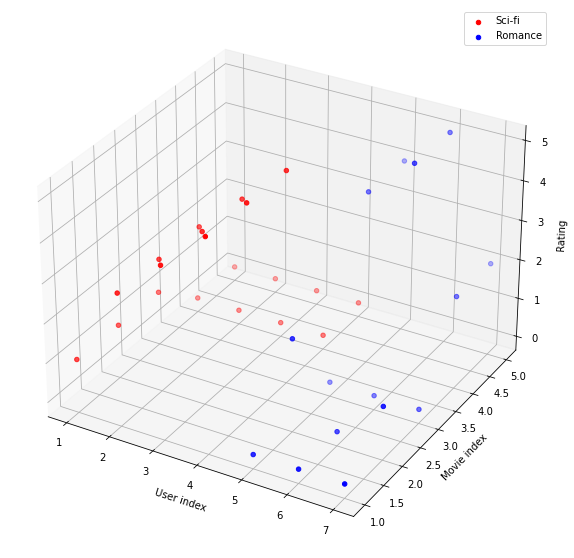

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x=user_index
y=movie_index
z=ratings

ax.scatter(x[:20], y[:20], z[:20], c='red', label='Sci-fi')
ax.scatter(x[-15:], y[-15:], z[-15:], c='blue', label='Romance')

ax.set_xlabel('User index')
ax.set_ylabel('Movie index')
ax.set_zlabel('Rating')
ax.legend()

plt.show()

#### 3. Center the dataset

In [79]:
# compute the mean value of each movie
rating_mean = m.mean(axis=0)

# Center them by deducting it by mean
X = m - rating_mean

#### 4. Implement PCA using Singular Value Decomposition (SVD) – Solution1

In [80]:
u,s,v_t=np.linalg.svd(X)

#### 5. Plot the eigenvalues and select the right number K of principal components. What number do you choose for K ? Explain your choice. 

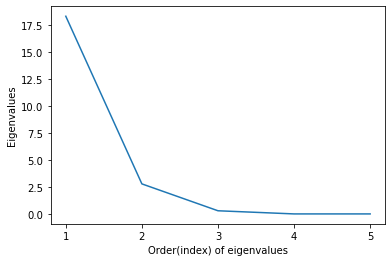

In [92]:
x_axis = []
for i in range(len(s)):
    x_axis.append(i+1)
x_axis = np.asarray(x_axis)

# note that eigenvalues are the squared values of singular values
y_axis = s*s/(X.shape[0]-1)

fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.set_xticks([1, 2, 3, 4, 5])
plt.xlabel('Order(index) of eigenvalues')
plt.ylabel('Eigenvalues')
plt.show()

I would choose K=2. 

As shown on the graph, the 1st eigenvalue is above 100 and the 2nd eigenvalue is slightly lower than 20. For the 3rd, 4th, and 5th eigenvalues, the graph plateaus with values close to 0. 

This means that the 1st and the 2nd eigenvalues reflect the majority of the variances of the dataset. Therefore, I would select to value of K to be 2.

#### 6.Calculate the compressed data with the K you choose from step 4

In [82]:
# I chose K to be 2.
K=2
# I took the first 2 rows of the v_T matrix. 
K_v_T = v_t[:K, :]
# multiply it by the centered data X
X_compressed = X.dot(K_v_T.T)
print(X_compressed)

[[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


### 7. Implement PCA by directly computing the eigenvectors (V) and eigenvalues (D) from covariance matrix

In [83]:
K=2

# obtain the covariance matrix
covariance_matrix = np.cov(X, rowvar=False)

# calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# sort it by the descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# select the top K eigenvectors
top_k_eigenvectors = eigenvectors[:, :K]

# project the data
X_compressed = X.dot(top_k_eigenvectors)

# print the data after it is compressed
print(X_compressed)

[[-0.14417203  2.82787396]
 [-2.7775391   0.57977689]
 [-4.09422264 -0.54427165]
 [-5.41090617 -1.66832018]
 [ 4.07253971 -1.16872711]
 [ 5.73177463 -1.41792961]
 [ 2.6225256   1.3915977 ]]


#### 8. Print the V and D

In [89]:
print("eigenvectors:")
print(np.round(eigenvectors, decimals=5))
print("eigenvalues:")
print(np.round(eigenvalues, decimals=5))

eigenvectors:
[[-0.4715  -0.35583  0.38868  0.70701 -0.03389]
 [-0.37369 -0.41238 -0.83084  0.       0.     ]
 [-0.4715  -0.35583  0.38868 -0.70701  0.03389]
 [ 0.45593 -0.53699  0.06147  0.01179 -0.70629]
 [ 0.45593 -0.53699  0.06147 -0.01179  0.70629]]
eigenvalues:
[18.34876  2.78759  0.29223  0.       0.     ]


## Task 2. Human Faces

### 1. Load dataset and packages

In [11]:
# import necessary packages
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people

In [12]:
# load the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70)

Note that:
- images: 3D matrix (number of images * row num * column num)
- data: 2D matrix (number of images * pixels (left to right, up to down))
- target: 1D array (number of images (the ID of different people))

In [13]:
images_count, row, col = lfw_people.images.shape
# row*col = number of features in this case. 
pixels = row*col 
X = lfw_people.data
X = np.asarray(X)
y = lfw_people.target

### 2. Display the fourth image

In [14]:
# function for image display
def display_image(x,row,col):
    plt.imshow(x.reshape((row, col)), cmap=plt.cm.gray)

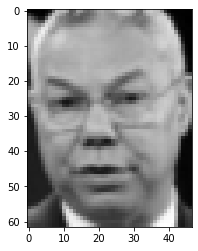

In [15]:
# Display the fourth image (index = 3)
display_image(X[3],row,col)

### 3. Compute the mean of all the examples in the dataset and display the mean image

In [16]:
# compute the mean value
x_mean = np.mean(X,axis = 0)

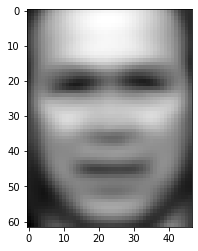

In [17]:
# display the mean image
display_image(x_mean,row,col)

### 4. Do dimensionality reduction with either of the pca algorithms you implemented

I directly compute the eigenvectors & eigenvalues from the covariance matrix. 

In [18]:
# We get top 5 PCs here.
K=5

# normalized the data
X_normalized = X - X.mean(axis=0)

# obtain the covariance matrix
covariance_matrix = np.cov(X_normalized, rowvar=False)

# calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# sort it by the descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# select the top K eigenvectors
top_k_eigenvectors = eigenvectors[:, :K]


### 5. Print the top 5 principal components. 

Note that, each **COLUMN** represents a principal component

In [19]:
print("top 5 principal components (columns):")
print(np.round(top_k_eigenvectors,5))

top 5 principal components (columns):
[[ 0.00537+0.j  0.01746+0.j  0.01784+0.j  0.03352+0.j -0.01315+0.j]
 [ 0.0057 +0.j  0.01648+0.j  0.01603+0.j  0.03529+0.j -0.01358+0.j]
 [ 0.00614+0.j  0.01628+0.j  0.01489+0.j  0.03671+0.j -0.01404+0.j]
 ...
 [ 0.01043+0.j -0.0332 +0.j  0.03724+0.j  0.03841+0.j  0.09058+0.j]
 [ 0.00883+0.j -0.03265+0.j  0.03316+0.j  0.03525+0.j  0.08371+0.j]
 [ 0.0074 +0.j -0.03143+0.j  0.03093+0.j  0.0292 +0.j  0.07457+0.j]]


### 6. Project the 4th face in the dataset onto the first 5 PCs and show the values of the associated 5 attributes.

In [20]:
# Project the 4th image (index: 3)
# Don't forget to normalize the data. 
x4_compressed = (X[3]-X.mean(axis=0)).dot(top_k_eigenvectors)
# Show the attributes
print(x4_compressed)

[-202.54211048+0.j -261.4771061 +0.j -418.97385481+0.j   29.39880556+0.j
  -39.78527707+0.j]


### 7. Project the 4th face with first 5 principal components back into the original image space and display it.

In [21]:
# Project back to the original dimension.
# Don't forget to recover the deducted mean value during normalization
x_back = x4_compressed.dot(top_k_eigenvectors.T) + X.mean(axis = 0)
print(x_back)

[ 80.32732079+0.j  84.49613838+0.j  91.05393026+0.j ... 105.85437754+0.j
 101.30370242+0.j  96.07240319+0.j]


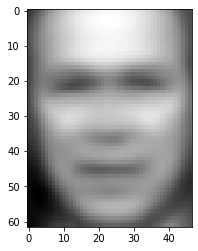

In [22]:
display_image(np.real(x_back),row,col)

### 8. Repeat step 5-8 with the first 50 principal components (instead of 5).

In [23]:
# We get top 5 PCs here.
K=50

# normalized the data
X_normalized = X - X.mean(axis=0)

# obtain the covariance matrix
covariance_matrix = np.cov(X_normalized, rowvar=False)

# calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# sort it by the descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# select the top K eigenvectors
top_k_eigenvectors = eigenvectors[:, :K]


In [24]:
print("top 50 principal components (each COLUMN):")
print(np.round(top_k_eigenvectors,5))

top 50 principal components (each COLUMN):
[[ 0.00537+0.j  0.01746+0.j  0.01784+0.j ... -0.01448+0.j -0.01198+0.j
   0.01935+0.j]
 [ 0.0057 +0.j  0.01648+0.j  0.01603+0.j ... -0.01926+0.j -0.01469+0.j
   0.01878+0.j]
 [ 0.00614+0.j  0.01628+0.j  0.01489+0.j ... -0.02812+0.j -0.01698+0.j
   0.01489+0.j]
 ...
 [ 0.01043+0.j -0.0332 +0.j  0.03724+0.j ...  0.01209+0.j  0.00427+0.j
  -0.02642+0.j]
 [ 0.00883+0.j -0.03265+0.j  0.03316+0.j ...  0.02504+0.j  0.00788+0.j
  -0.01764+0.j]
 [ 0.0074 +0.j -0.03143+0.j  0.03093+0.j ...  0.02706+0.j  0.01589+0.j
  -0.0134 +0.j]]


In [25]:
# Project the 4th image (index: 3)
# Don't forget to normalize the data. 
x4_compressed = (X[3]-X.mean(axis=0)).dot(top_k_eigenvectors)
# Show the attributes
print("50 attributes as shown below:")
print(x4_compressed)

50 attributes as shown below:
[-202.54211048+0.j -261.4771061 +0.j -418.97385481+0.j   29.39880556+0.j
  -39.78527707+0.j -616.43771378+0.j -318.06589271+0.j   -7.35724851+0.j
 -537.82700475+0.j   77.62395051+0.j  744.33979887+0.j  -12.98967166+0.j
  413.10837277+0.j  594.75179755+0.j  408.67118359+0.j  -73.56007724+0.j
 -391.36694625+0.j  435.8061996 +0.j -617.13576242+0.j -311.41561755+0.j
 -335.18229658+0.j  452.38666742+0.j -190.78973111+0.j  432.78562503+0.j
  181.27572924+0.j  240.39504578+0.j -296.41391321+0.j  141.6360232 +0.j
   13.80491259+0.j  -89.58786955+0.j  -73.40296208+0.j   34.71033394+0.j
 -284.48923979+0.j  133.530206  +0.j -126.52855022+0.j  219.94602322+0.j
  123.20643437+0.j  -74.72774218+0.j   59.83263022+0.j  -80.10555754+0.j
  104.45730942+0.j  190.57802886+0.j  -50.27674826+0.j   -2.42724504+0.j
   55.91868407+0.j  -56.91997149+0.j  219.15692178+0.j   62.83639663+0.j
   72.26351977+0.j  -99.57485967+0.j]


[28.40194862+0.j 45.43836931+0.j 70.3865007 +0.j ... 69.68317409+0.j
 53.57694362+0.j 47.74526849+0.j]


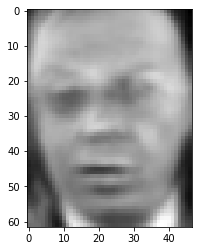

In [26]:
# Project back to the original dimension.
# Don't forget to recover the deducted mean value during normalization
x_back = x4_compressed.dot(top_k_eigenvectors.T) + X.mean(axis = 0)
print(x_back)
display_image(np.real(x_back),row,col)